### Aggregate the final glaciers that have been chosen for our study, and the debris-covered area within them that will be used at the final AOI

Prior to this:
1. we automated the first-pass of by selecting glaciers according to debris-covered area in herreid et al 2020
2. we manually inspected those glaciers in QGIS, with multiple imagery basemaps, to select glaciers that we thought had significant debris cover
3. we then created a sentienl-2 cloud-free snow-free mosaic in GEE, which we used to further sub-select glaciers that had a significant portion of debris cover. this generally meant they had at least a 500 m stretch of continuous debris cover with no exposed glacier ice within this section.
4. manually selected the debris-covered regions of each glacier that will be used (in GEE)

Now we have the debris-covered shapefiles, that were exported from GEE. We need ot merge these together and create the final shapefiles.

We want:
1. shapefile with the orginal RGI outlines, with RGI info, for each of the ~800 glaciers
2. shapefile with the RGI info but the debris-covered outline for each glacier
3. shapefile that holds a 5 km buffer around the glaciers

In [1]:
import os
import rasterio as rio
import numpy as np
import shapely
import pyproj
import geopandas as gpd
import matplotlib.pyplot as plt
import rioxarray as riox
import rasterio as rio
import xarray as xr
import pandas as pd
from datetime import timedelta
from datetime import datetime

In [2]:
# define folder and file paths
folder_HMA = os.path.join('C:',os.sep,'Users','lzell','OneDrive - Colostate','Desktop',"HMA2")
folder_aoi = os.path.join(folder_HMA, 'Datasets', 'AOI definition')
folder_rgi = os.path.join(folder_HMA, 'Datasets', 'RGI')

In [3]:
# open RGI v7 
rgi_15 = gpd.read_file(os.path.join(folder_rgi, 'v7', 'G', 'RGI2000-v7.0-G-15_south_asia_east', 'RGI2000-v7.0-G-15_south_asia_east.shp')).to_crs("ESRI:102025")
rgi_15['geometry'] = gpd.GeoSeries.from_wkb(rgi_15.to_wkb(output_dimension=2).geometry)
rgi_14 = gpd.read_file(os.path.join(folder_rgi, 'v7', 'G', 'RGI2000-v7.0-G-14_south_asia_west', 'RGI2000-v7.0-G-14_south_asia_west.shp')).to_crs("ESRI:102025")
rgi_14['geometry'] = gpd.GeoSeries.from_wkb(rgi_14.to_wkb(output_dimension=2).geometry)
rgi_13 = gpd.read_file(os.path.join(folder_rgi, 'v7', 'G', 'RGI2000-v7.0-G-13_central_asia', 'RGI2000-v7.0-G-13_central_asia.shp')).to_crs("ESRI:102025")
rgi_13['geometry'] = gpd.GeoSeries.from_wkb(rgi_13.to_wkb(output_dimension=2).geometry)
rgi_all = gpd.GeoDataFrame(pd.concat([rgi_13, rgi_14, rgi_15]))

In [4]:
# open the debris-covered shapefiles we exported from GEE
dc_a = gpd.read_file(os.path.join(folder_aoi, "Final AOI", "rgi_debris_a.shp")).to_crs("ESRI:102025")
dc_b = gpd.read_file(os.path.join(folder_aoi, "Final AOI", "rgi_debris_b.shp")).to_crs("ESRI:102025")
rgi_dc_final = gpd.GeoDataFrame(pd.concat([dc_a, dc_b]))

In [5]:
# subset the rgi to just the glaciers that are in dc_all
rgi_to_use = rgi_dc_final['rgi_id'].values
rgi_final = rgi_all[ rgi_all['rgi_id'].isin(rgi_to_use) ]

In [6]:
# buffer rgi by 5km
rgi_final_5km_buffer = gpd.GeoDataFrame(crs=rgi_final.crs,
                       geometry=[rgi_final.buffer(5000).unary_union])

(769, 29)
(769, 30)


<Axes: >

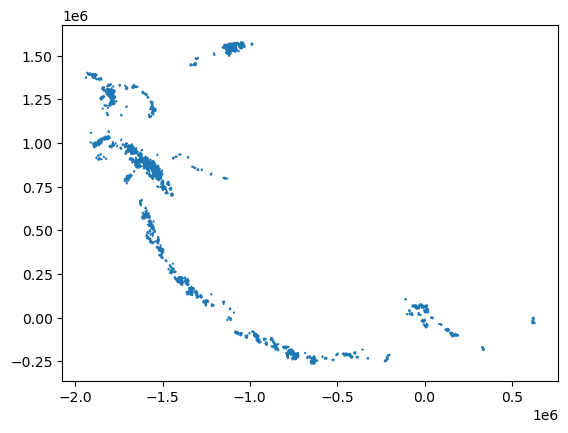

In [8]:
print(rgi_final.shape)
print(rgi_dc_final.shape)
rgi_final_5km_buffer.plot()

In [11]:
# save these
out_path = os.path.join(folder_HMA, "Datasets", 'AOI definition', 'Final AOI', "Final Products", "AOI_full_rgi.shp")
rgi_final.to_file(out_path)

out_path = os.path.join(folder_HMA, "Datasets", 'AOI definition', 'Final AOI', "Final Products", "AOI_dc_rgi.shp")
rgi_dc_final.to_file(out_path)

out_path = os.path.join(folder_HMA, "Datasets", 'AOI definition', 'Final AOI', "Final Products", "AOI_5km.shp")
rgi_final_5km_buffer.to_file(out_path)